In [1]:
import torch
import matplotlib.pyplot as plt

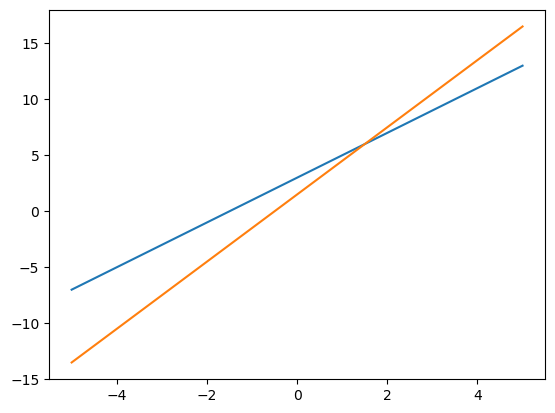

In [5]:
x = torch.linspace(-5, 5, 101)
y = lambda x: x * 2 + 3
z = lambda x: x * 3 + 1.5

plt.plot(x, y(x))
plt.plot(x, z(x))

plt.show()

In [27]:
n_sample = 100
rx = (torch.rand(n_sample) - 0.5) * 10
ry = y(rx) + torch.randn(n_sample)
rz = z(rx) + torch.randn(n_sample)

mask = torch.rand(n_sample) < 0.5
rp = torch.zeros(n_sample)
rp[mask] = ry[mask]
rp[~mask] = rz[~mask]

mse_y = lambda p: (y(rx) - p).square()
mse_z = lambda p: (z(rx) - p).square()

def find_left_big(left, right):
    while True:
        idx = torch.randint(0, 10, [1])
        if left[idx] > right[idx]:
            break
    return idx

for _ in range(1000):
    my = mse_y(rp).sum()
    mz = mse_z(rp).sum()

    if my - mz < 1e-7:
        break

    if my > mz:
        y_idx = find_left_big(mse_y(rp), mse_z(rp))
        rp[y_idx] -= torch.randn(1)
    else:
        z_idx = find_left_big(mse_z(rp), mse_y(rp))
        rp[z_idx] -= torch.randn(1)

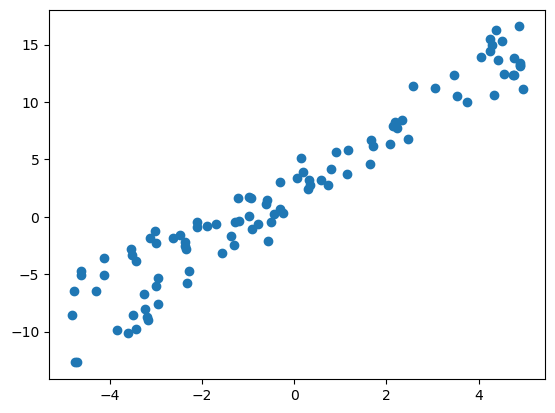

In [28]:
plt.scatter(rx, rp)

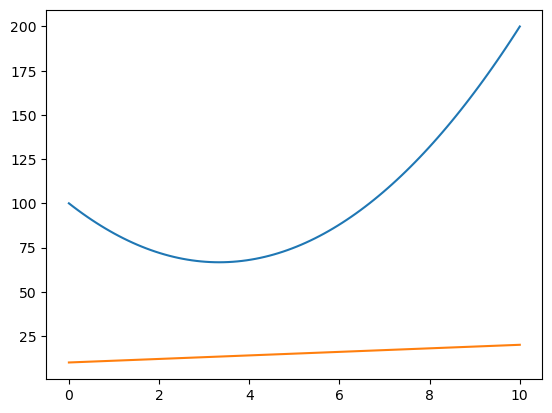

In [29]:
t = 10
se = lambda p: (10 - p)**2 + 2 * p**2
ae = lambda p: (10 - p) + 2 * p

p = torch.linspace(0, 10, 100)
sev = se(p)
aev = ae(p)

plt.plot(p, sev)
plt.plot(p, aev)

plt.show()